<a href="https://colab.research.google.com/github/chunyuan0221/3rd-ML100days/blob/master/Day_080_optimizer%26lr_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [0]:
import os
import keras
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [0]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
def build_mlp(input_shape, output_units=10, neuron_units=[512, 256, 128, 64]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.Input(shape=input_shape)
    for i, neurons in enumerate(neuron_units):
        if i == 0:
            x = keras.layers.Dense(units=neurons, activation='relu')(input_layer)
            x = keras.layers.Dropout(0.2)(x)
        else:
            x = keras.layers.Dense(units=neurons, activation='relu')(x)
            x = keras.layers.Dropout(0.2)(x)
    
    out = keras.layers.Dense(units=output_units, activation='softmax')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [0]:
## 超參數設定
"""
Set your required experiment parameters
"""
EPOCH = 50
BATCH_SIZE = 256
MOMENTUM = 0.9
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4]

In [0]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for i, LR in enumerate(LEARNING_RATE):
    SGD = keras.optimizers.SGD(lr=LR, momentum=MOMENTUM)
    RMSprop = keras.optimizers.RMSprop(lr=LR)
    AdaGrad = keras.optimizers.Adagrad(lr=LR)
    Adam = keras.optimizers.Adam(lr=LR)
    OPTIMIZER = dict(SGD=SGD, RMSprop=RMSprop, AdaGrad=AdaGrad, Adam=Adam)
    for j, opt_name in enumerate(OPTIMIZER.keys()):
        if j == 0:
            print("Experiment with LR = %.6f, optimizer = %s" %(LR, opt_name))
            model = build_mlp(x_train.shape[1:])
            model.compile(optimizer=OPTIMIZER[opt_name], loss='categorical_crossentropy', metrics=['accuracy'])
            model.fit(x_train, y_train, 
                      epochs=EPOCH, 
                      batch_size=BATCH_SIZE,
                      validation_data=(x_test, y_test))

            train_loss = model.history.history['loss']
            valid_loss = model.history.history['val_loss']
            train_acc = model.history.history['acc']
            valid_acc = model.history.history['val_acc']
            results[f'lr={LR}_opt={opt_name}'] = dict(train_loss=train_loss,
                                                      valid_loss=valid_loss,
                                                      train_acc=train_acc,
                                                      valid_acc=valid_acc)
        else:
            keras.backend.clear_session()
            SGD = keras.optimizers.SGD(lr=LR, momentum=MOMENTUM)
            RMSprop = keras.optimizers.RMSprop(lr=LR)
            AdaGrad = keras.optimizers.Adagrad(lr=LR)
            Adam = keras.optimizers.Adam(lr=LR)
            OPTIMIZER = dict(SGD=SGD, RMSprop=RMSprop, AdaGrad=AdaGrad, Adam=Adam)

            print("Experiment with LR = %.6f, optimizer = %s" %(LR, opt_name))
            model = build_mlp(x_train.shape[1:])
            model.compile(optimizer=OPTIMIZER[opt_name], loss='categorical_crossentropy', metrics=['accuracy'])
            model.fit(x_train, y_train, 
                      epochs=EPOCH, 
                      batch_size=BATCH_SIZE,
                      validation_data=(x_test, y_test))
            
            train_loss = model.history.history['loss']
            valid_loss = model.history.history['val_loss']
            train_acc = model.history.history['acc']
            valid_acc = model.history.history['val_acc']
            results[f'lr={LR}_opt={opt_name}'] = dict(train_loss=train_loss,
                                                      valid_loss=valid_loss,
                                                      train_acc=train_acc,
                                                      valid_acc=valid_acc)

Experiment with LR = 0.100000, optimizer = SGD
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.0795 - acc: 0.2154 - val_loss: 1.8892 - val_acc: 0.2992
Epoch 2/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.9671 - acc: 0.2738 - val_loss: 1.8711 - val_acc: 0.3271
Epoch 3/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.9108 - acc: 0.2982 - val_loss: 1.8365 - val_acc: 0.3315
Epoch 4/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.9130 - acc: 0.2974 - val_loss: 1.8312 - val_acc: 0.3377
Epoch 5/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.8844 - acc: 0.3112 - val_loss: 1.8247 - val_acc: 0.3353
Epoch 6/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.8589 - acc: 0.3222 - val_loss: 1.7770 - val_acc: 0.3421
Epoch 7/50
50000/50000 [==============================] - 2s 48us/step - loss: 1

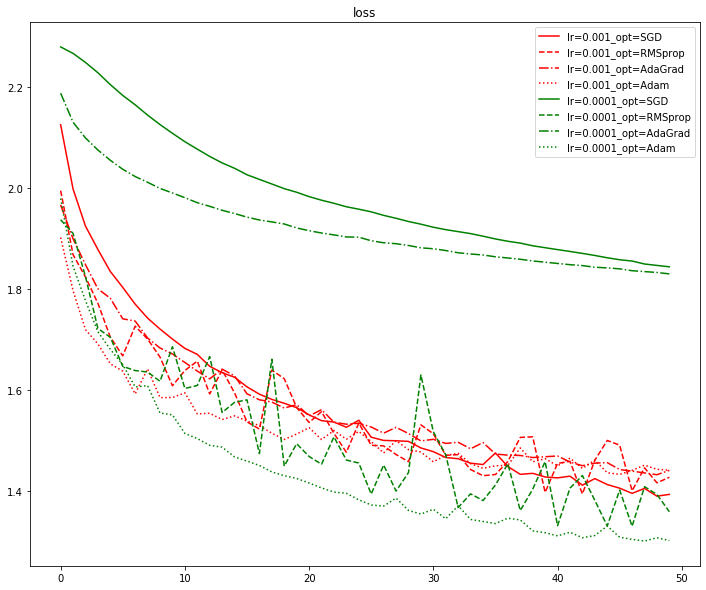

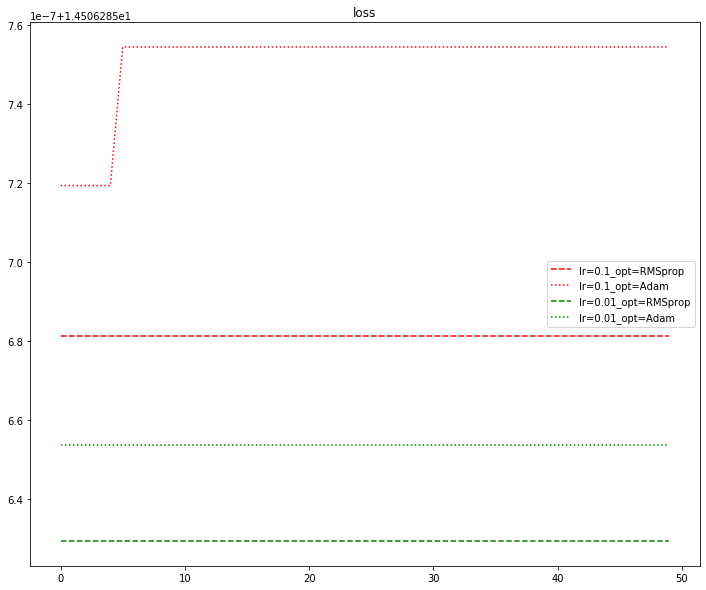

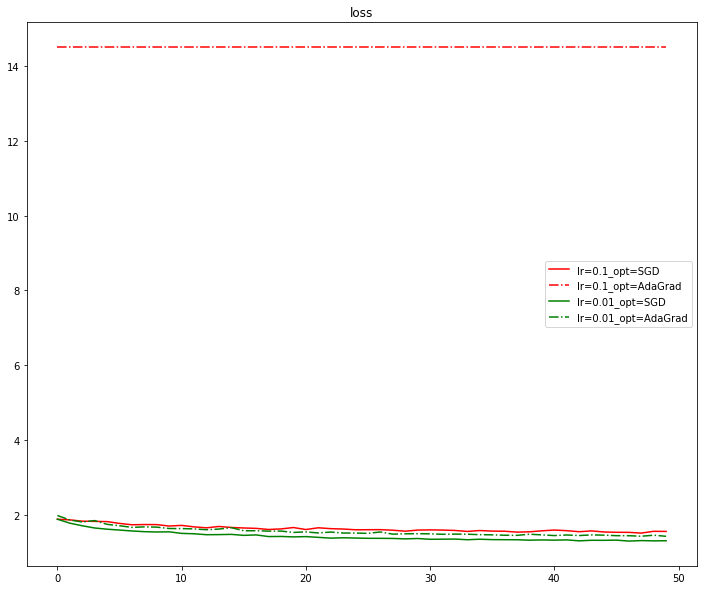

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm']
results_key = list(results.keys())
i, j = 8, 0
plt.figure(figsize=(12, 10))
while i < 16:
    plt.plot(results[results_key[i]]['valid_loss'], '-', color=color_bar[j], label=results_key[i])
    plt.plot(results[results_key[i+1]]['valid_loss'], '--', color=color_bar[j], label=results_key[i+1])
    plt.plot(results[results_key[i+2]]['valid_loss'], '-.', color=color_bar[j], label=results_key[i+2])
    plt.plot(results[results_key[i+3]]['valid_loss'], ':', color=color_bar[j], label=results_key[i+3])
    i += 4
    j += 1
plt.title('loss')
plt.legend()
plt.show()

i, j = 0, 0
plt.figure(figsize=(12, 10))
while i < 8:
    #plt.plot(results[results_key[i]]['valid_loss'], '-', color=color_bar[j], label=results_key[i])
    plt.plot(results[results_key[i+1]]['valid_loss'], '--', color=color_bar[j], label=results_key[i+1])
    #plt.plot(results[results_key[i+2]]['valid_loss'], '-.', color=color_bar[j], label=results_key[i+2])
    plt.plot(results[results_key[i+3]]['valid_loss'], ':', color=color_bar[j], label=results_key[i+3])
    i += 4
    j += 1
plt.title('loss')
plt.legend()
plt.show()

i, j = 0, 0
plt.figure(figsize=(12, 10))
while i < 8:
    plt.plot(results[results_key[i]]['valid_loss'], '-', color=color_bar[j], label=results_key[i])
    #plt.plot(results[results_key[i+1]]['valid_loss'], '--', color=color_bar[j], label=results_key[i+1])
    plt.plot(results[results_key[i+2]]['valid_loss'], '-.', color=color_bar[j], label=results_key[i+2])
    #plt.plot(results[results_key[i+3]]['valid_loss'], ':', color=color_bar[j], label=results_key[i+3])
    i += 4
    j += 1
plt.title('loss')
plt.legend()
plt.show()

### Result
***
1. 首先我們列出了4組Learning rate和Optimizer，分別交叉組成。
  - Learning rate:[0.1, 0.01, 0.001, 0.0001]
  - Optimizer:[SGD, RMSprop, AdaGrad, Adam]
2. 我們將16組結果圖示化呈現，我們發現有幾組的loss特別得大且沒有收斂跡象。
  - lr=0.1, opt=RMSprop (上圖第2張)
  - lr=0.1, opt=AdaGrad (上圖第3張)
  - lr=0.1, opt=Adam    (上圖第2張)
  - lr=0.01, opt=RMSprop(上圖第2張)
  - lr=0.01, opt=Adam   (上圖第2張)
  - 第2張圖左上角標示1.45*1e-7
3. 最後，我們可以得到:
  - SGD optimizer 在不同大小的Learning rate上能有穩定的收斂效果
  - AdaGrad、RMSprop、Adam在比較大的Learning rate上，會導致模型無法收斂。
